In [1]:
import pickle
import networkx as nx

In [2]:
def get_sub_graph(G, layer):
    sub_graph = nx.Graph()
    for node, data in G.nodes(data=True):
        if 'layer' in data and data['layer'] == layer:
            sub_graph.add_node(node, **data)
    for node1, node2, data in G.edges(data=True):
        if 'layer' in data and data['layer'] == layer:
            sub_graph.add_edge(node1, node2, **data)
    return sub_graph

In [3]:
MLN = pickle.load(open('../Multilayer Network/MLN.pickle', 'rb'))
sp_layer = get_sub_graph(MLN, 'socialphenomenon')
pickle.dump(sp_layer, open('sp_layer.pickle', 'wb'))
del MLN

In [5]:
# Compute the clustering coefficient of the sub-type
clustering_coeff = nx.average_clustering(sp_layer)

# Calculate the number of triangles in the sub-graph
triangles = sum(nx.triangles(sp_layer).values()) / 3

# Calculate the number of connected triples in the sub-graph
connected_triples = sum(nx.triangles(sp_layer).values()) / 6

# Calculate the triadic closure
triadic_closure = 3 * triangles / connected_triples

# Compute the sub-graph centrality of the sub-type
sub_graph_centrality = sum(nx.degree_centrality(sp_layer).values())

In [8]:
sub_graph_centrality

3.2

In [9]:
social_content_layer = nx.Graph()
for s, data in sp_layer.nodes(data=True):
    social_content_layer.add_node(s, **data)

In [10]:
MLN = pickle.load(open('../Multilayer Network/MLN.pickle', 'rb'))

In [11]:
multi_layer_edges = [(u,v,data) for u,v,data in MLN.edges(data=True) if data['layer']=='multi_c_s']

In [14]:
content_to_social_map = {}
for edge in multi_layer_edges:
    if edge[0] not in content_to_social_map:
        content_to_social_map[edge[0]] = []
    content_to_social_map[edge[0]].append(edge[1])
content_to_social_map_filtered = {}
for c in content_to_social_map:
    if len(content_to_social_map[c]) > 1:
        content_to_social_map_filtered[c] = content_to_social_map[c]

In [28]:
result = {}
for content_node, social_nodes in content_to_social_map_filtered.items():
    for i, s1 in enumerate(social_nodes):
        for s2 in social_nodes[i+1:]:
            try:
                result[(s1,s2)].extend([content_node])
                result[(s1,s2)] = list(set(result[(s1,s2)]))
            except:
                result[(s1,s2)] = [content_node]

In [44]:
for res in result.keys():
    social_content_layer.add_edge(res[0], res[1], label=result[res])
pickle.dump(social_content_layer, open('social_content_layer.pickle','wb'))

{'L': 337.0, 'S': 908.2, 'M': 818.6, 'A': 1005.2, 'E': 333.4, 'I': 589.8}


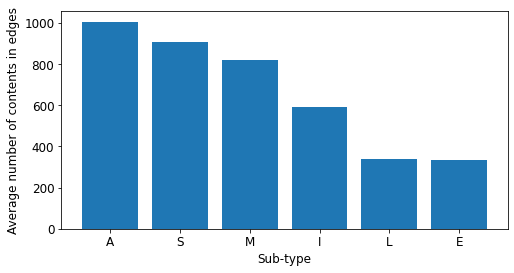

In [61]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

def average_num_labels(G):
    node_labels = {}
    for node in G.nodes():
        edges = G.edges(node, data='label')
        labels = []
        for _, _, label in edges:
            labels += label
        node_labels[node] = len(set(labels)) / len(edges)
    return node_labels

def plot_average_num_labels(G):
    node_labels = average_num_labels(G)
    plt.figure(figsize=(8,4))
    print(node_labels)
    sorted_data = sorted(node_labels.items(), key=lambda x: x[1], reverse=True)
    labels = [x[0] for x in sorted_data]
    values = [x[1] for x in sorted_data]
    plt.bar(labels, values)
    plt.xlabel('Sub-type')
    plt.ylabel('Average number of contents in edges')
    plt.savefig('st_occ.pdf')
    plt.show()
    
plot_average_num_labels(social_content_layer)

In [53]:
import networkx as nx

def compute_centralities(graph):
    degree_centrality = nx.degree_centrality(graph)
    eigenvector_centrality = nx.eigenvector_centrality_numpy(graph, weight='weight')
    betweenness_centrality = nx.betweenness_centrality(graph, weight='weight')
    return degree_centrality, eigenvector_centrality, betweenness_centrality

# Create the weighted graph
for u, v, data in social_content_layer.edges(data=True):
    social_content_layer[u][v]['weight'] = len(data['label'])

# Compute the centralities
degree_centrality, eigenvector_centrality, betweenness_centrality = compute_centralities(social_content_layer)

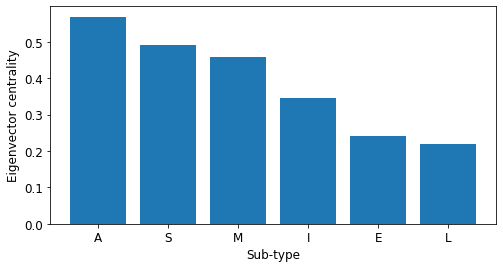

In [59]:
sorted_data = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

labels = [x[0] for x in sorted_data]
values = [x[1] for x in sorted_data]

plt.figure(figsize=(8,4))
plt.bar(labels, values)
plt.xlabel('Sub-type')
plt.ylabel('Eigenvector centrality')
plt.savefig('eigen_st.pdf')

plt.show()

In [63]:
print(eigenvector_centrality)

{'L': 0.2197476450454089, 'S': 0.49047143554551387, 'M': 0.45916648289208734, 'A': 0.5685347128063432, 'E': 0.24116317871657883, 'I': 0.34485284682738915}
